In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from torchsummary import summary

In [3]:
df = pd.read_csv("C:/Users/문도/Desktop/인지개 자료/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


Text(0.5, 1.0, 'Blood_Pressure_Abnormality')

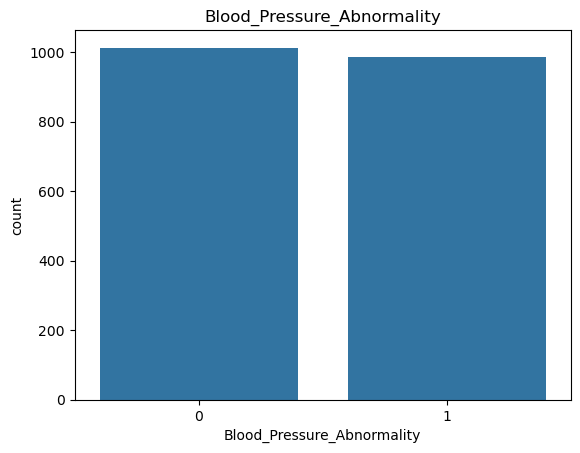

In [4]:
sns.countplot(data=df, x="Blood_Pressure_Abnormality")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("count")
plt.title("Blood_Pressure_Abnormality")

In [5]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [6]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

Text(0.5, 1.0, 'Blood_Pressure_Abnormality')

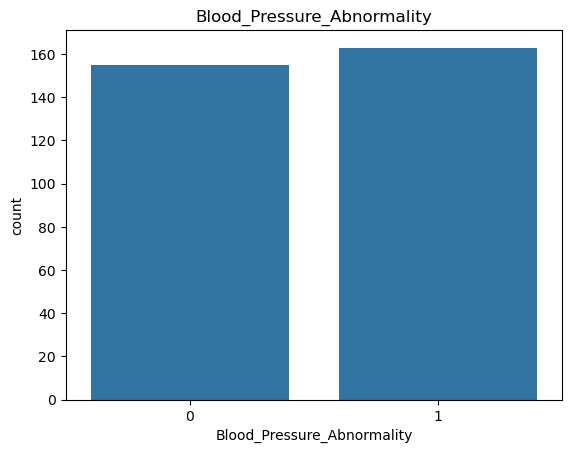

In [8]:
sns.countplot(data=df, x="Blood_Pressure_Abnormality")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("count")
plt.title("Blood_Pressure_Abnormality")

In [9]:
X = df.drop('Blood_Pressure_Abnormality', axis = 1).values
X

array([[7.000e+00, 1.169e+01, 7.500e-01, ..., 3.000e+00, 1.000e+00,
        1.000e+00],
       [1.600e+01, 1.096e+01, 1.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [2.900e+01, 9.370e+00, 9.500e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.966e+03, 1.112e+01, 5.700e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.970e+03, 1.474e+01, 8.800e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.984e+03, 1.456e+01, 2.700e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [10]:
y = df['Blood_Pressure_Abnormality'].values
y

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,

In [11]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((254, 14), (254,), (64, 14), (64,))

In [13]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int64)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.int64)

In [21]:
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size = 64, shuffle = False)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([254, 14]),
 torch.Size([254]),
 torch.Size([64, 14]),
 torch.Size([64]))

In [23]:
class BP_dateDense(nn.Module):
    def __init__(self):
        super(BP_dateDense, self).__init__()
        self.fc1 = nn.Linear(14, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(0.5)  # 50% 확률로 뉴런 제거

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # dropout after fc1
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  # dropout again
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = BP_dateDense()

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-4)

In [25]:
train_losses = []
test_accuracies = []

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]: .4f}, Accuracy: {accuracy: .2f}%")

print("Training complete.")

Epoch 1/50, Loss:  0.6907, Accuracy:  37.50%
Epoch 2/50, Loss:  0.6884, Accuracy:  39.06%
Epoch 3/50, Loss:  0.6824, Accuracy:  39.06%
Epoch 4/50, Loss:  0.6770, Accuracy:  39.06%
Epoch 5/50, Loss:  0.6720, Accuracy:  39.06%
Epoch 6/50, Loss:  0.6615, Accuracy:  40.62%
Epoch 7/50, Loss:  0.6551, Accuracy:  42.19%
Epoch 8/50, Loss:  0.6424, Accuracy:  43.75%
Epoch 9/50, Loss:  0.6390, Accuracy:  48.44%
Epoch 10/50, Loss:  0.6256, Accuracy:  48.44%
Epoch 11/50, Loss:  0.6028, Accuracy:  56.25%
Epoch 12/50, Loss:  0.6035, Accuracy:  59.38%
Epoch 13/50, Loss:  0.5779, Accuracy:  68.75%
Epoch 14/50, Loss:  0.5541, Accuracy:  68.75%
Epoch 15/50, Loss:  0.5316, Accuracy:  71.88%
Epoch 16/50, Loss:  0.5727, Accuracy:  71.88%
Epoch 17/50, Loss:  0.5606, Accuracy:  71.88%
Epoch 18/50, Loss:  0.5100, Accuracy:  75.00%
Epoch 19/50, Loss:  0.5426, Accuracy:  76.56%
Epoch 20/50, Loss:  0.4980, Accuracy:  78.12%
Epoch 21/50, Loss:  0.5114, Accuracy:  78.12%
Epoch 22/50, Loss:  0.5141, Accuracy:  78.1

In [26]:
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average = 'weighted')
precision = precision_score(all_labels, all_predictions, average = 'weighted')
recall = recall_score(all_labels, all_predictions, average = 'weighted')

specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i,:].sum() + conf_matrix[:,i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:,i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[27 12]
 [ 2 23]]
F1 score: 0.78
Precision: 0.82
Recall: 0.78
Specificity: 0.81


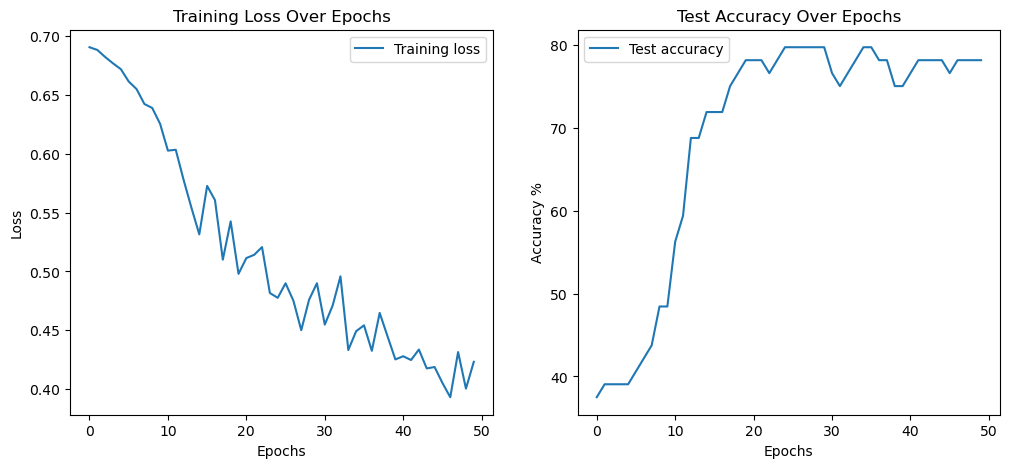

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()